<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [1]:
import pandas as pd
from src import soporte_nulos as sn
from src import soporte_preprocesamiento as sc
import warnings
warnings.filterwarnings("ignore")
import numpy as np

# 1. EDA

In [2]:
# cargamos el conjunto de datos con el que vamos a trabajar y mostramos 5 filas aleatorias
df = pd.read_csv("datos/autorenew.csv", index_col = 0) 
df.sample(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
dateCrawled,,,,,,,,,,,,,,,,,,,
2016-03-26 19:25:55,Audi_Q5_2.0_TDI_quattro,private,offer,19500,control,NaN,2010,manually,141.0,q5,150000,12,diesel,audi,no,2016-03-26 00:00:00,0,61462,2016-04-06 20:15:32
2016-03-07 22:49:23,Mercedes_Benz_213_CDI_Sprinter_H1L2_+2x_2er_SI...,private,offer,3499,test,bus,2000,manually,127.0,sprinter,150000,12,diesel,mercedes_benz,no,2016-03-07 00:00:00,0,6484,2016-03-25 20:45:34
2016-03-14 11:37:22,Volkswagen_Golf_2.0_GTI_Edition_35,private,offer,21500,test,NaN,2012,manually,232.0,golf,70000,3,petrol,volkswagen,no,2016-03-14 00:00:00,0,28816,2016-04-07 12:45:51
2016-03-25 16:25:39,Nissan_Qashqai_1.6_dCi_DPF_I_Way,private,offer,14500,test,NaN,2012,manually,129.0,qashqai,150000,5,diesel,nissan,no,2016-03-25 00:00:00,0,60320,2016-04-05 09:15:57
2016-03-26 10:57:17,E_klasse_w210,private,offer,700,test,combi,2000,manually,141.0,e_klasse,150000,10,diesel,mercedes_benz,yes,2016-03-26 00:00:00,0,59073,2016-03-26 10:57:17


In [3]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sc.Visualizador(df)

# llamamos al métedo para explorar los datos
sc.exploracion_datos(df)

El número de filas es 371528 y el número de columnas es 19

----------

En este conjunto de datos tenemos 29 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


vehicleType          36.003478
gearbox               5.439429
model                 5.513447
fuelType              8.986133
notRepairedDamage    19.395577
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640
notRepairedDamage,299468,2,no,263182



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 371528 non-null  object 
 1   seller               371528 non-null  object 
 2   offerType            371528 non-null  object 
 3   price                371528 non-null  int64  
 4   abtest               371528 non-null  object 
 5   vehicleType          237765 non-null  object 
 6   yearOfRegistration   371528 non-null  int64  
 7   gearbox              351319 non-null  object 
 8   powerCV              371528 non-null  float64
 9   model                351044 non-null  object 
 10  kilometer            371528 non-null  int64  
 11  monthOfRegistration  371528 non-null  int64  
 12  fuelType             338142 non-null  object 
 13  brand                371528 n

None

In [4]:
df_filtrado_categoricas = df.reset_index().drop(["name", "dateCreated", "lastSeen", "dateCrawled", "model", "kilometer", "postalCode"], axis=1)
df_filtrado_categoricas 


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
0,private,offer,480,test,NaN,1993,manually,0.0,0,petrol,volkswagen,NaN,0
1,private,offer,18300,test,coupe,2011,manually,187.0,5,diesel,audi,yes,0
2,private,offer,9800,test,suv,2004,automatic,161.0,8,diesel,jeep,NaN,0
3,private,offer,1500,test,small car,2001,manually,74.0,6,petrol,volkswagen,no,0
4,private,offer,3600,test,small car,2008,manually,68.0,7,diesel,skoda,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,private,offer,2200,test,NaN,2005,NaN,0.0,1,NaN,sonstige_autos,NaN,0
371524,private,offer,1199,test,convertible,2000,automatic,100.0,3,petrol,smart,no,0
371525,private,offer,9200,test,bus,1996,manually,101.0,3,diesel,volkswagen,no,0
371526,private,offer,3400,test,combi,2002,manually,99.0,6,diesel,volkswagen,NaN,0


In [5]:
visualizador2 =sc.Visualizador(df_filtrado_categoricas)

In [6]:
df_filtrado_categoricas.drop_duplicates(inplace=True)

In [7]:
df_filtrado_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350056 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   seller               350056 non-null  object 
 1   offerType            350056 non-null  object 
 2   price                350056 non-null  int64  
 3   abtest               350056 non-null  object 
 4   vehicleType          224722 non-null  object 
 5   yearOfRegistration   350056 non-null  int64  
 6   gearbox              332495 non-null  object 
 7   powerCV              350056 non-null  float64
 8   monthOfRegistration  350056 non-null  int64  
 9   fuelType             318853 non-null  object 
 10  brand                350056 non-null  object 
 11  notRepairedDamage    282360 non-null  object 
 12  nrOfPictures         350056 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 37.4+ MB


In [8]:
cond1 = df["price"] > 3000000
df.loc[cond1, "price"] = np.nan

atipicos = [999999, 999990,1010010,1234566,1111111,911911]
for ati in atipicos:
    condicion = df["price"] == ati
    df.loc[condicion,"price"] == np.nan

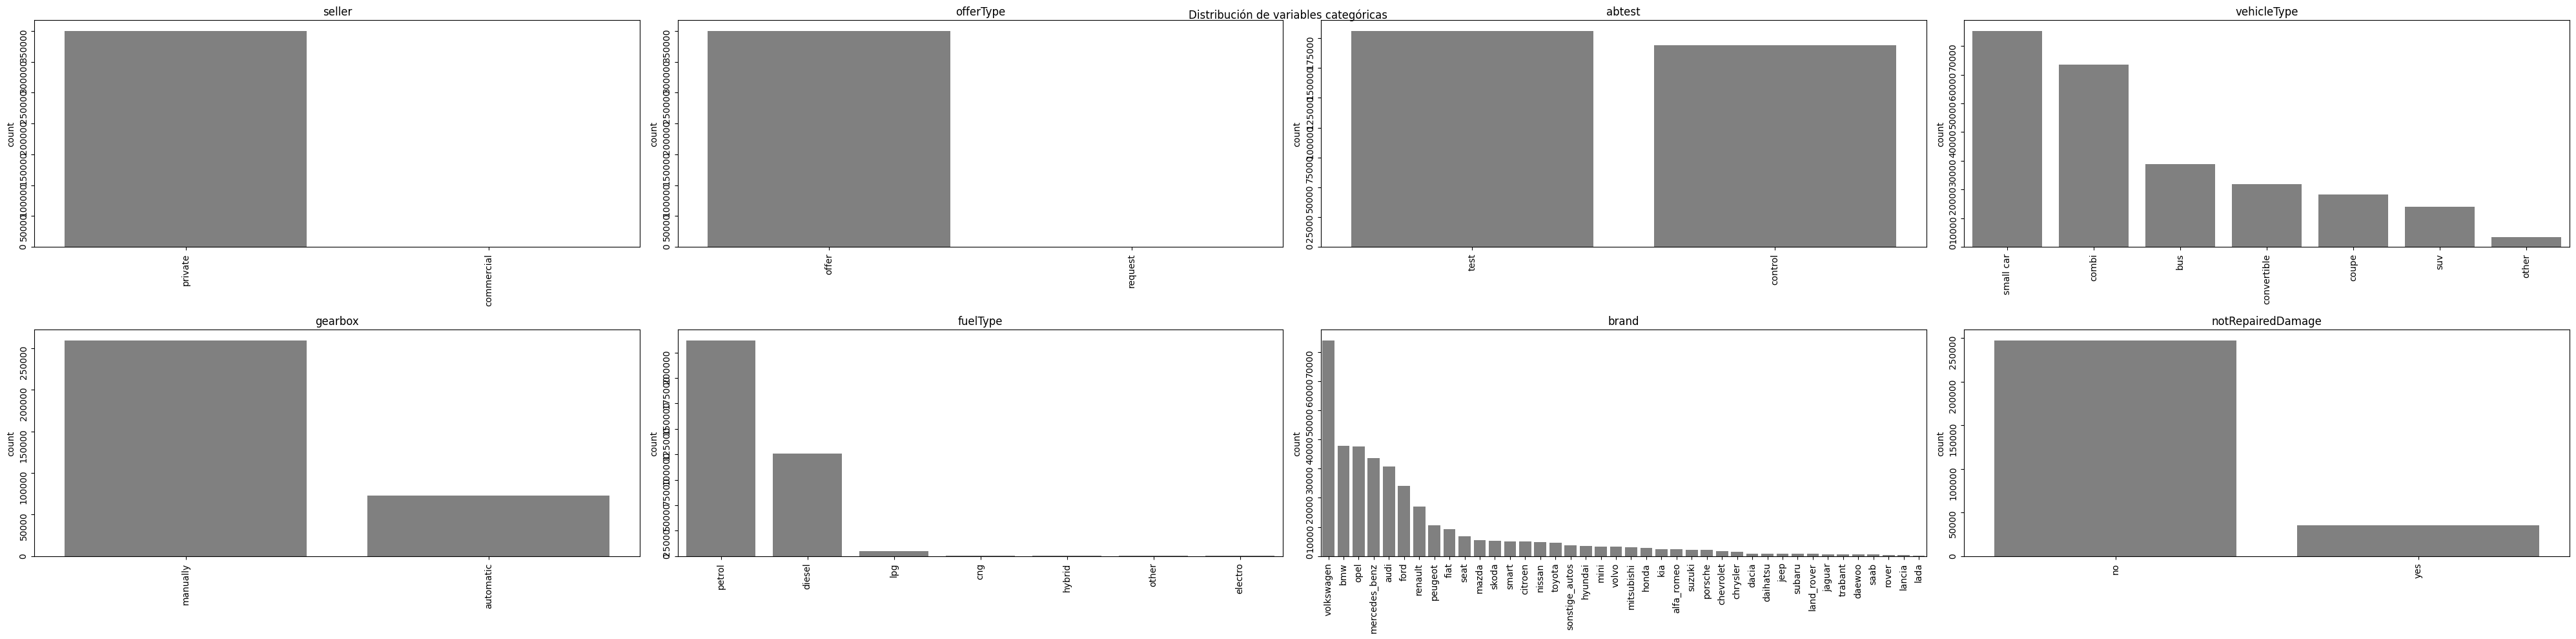

In [9]:
visualizador2.plot_categoricas()

### Resumen de Gráficas de Distribución de Variables Categóricas

1. **seller**:
   - La mayoría de los vehículos son vendidos por **vendedores privados**, con una cantidad mínima de **vendedores comerciales**.

2. **offerType**:
   - La mayoría de las ofertas son de tipo **"offer"** (venta), mientras que hay muy pocas o ninguna de tipo **"request"** (solicitud de compra).

3. **abtest**:
   - Los datos están divididos casi equitativamente entre las dos categorías de prueba: **control** y **test**.

4. **vehicleType**:
   - Los vehículos más comunes son los de tipo **"small car"**, seguidos de **"compact"** y **"bus"**.
   - Las categorías menos frecuentes son **"suv"** y **"other"**.

5. **gearbox**:
   - La **transmisión manual** es significativamente más común que la **automática**.

6. **fuelType**:
   - Los vehículos de **gasolina** son los más frecuentes, seguidos por los de **diésel**.
   - Otros tipos de combustible como **gas**, **híbrido** o **eléctrico** son mucho menos comunes.

7. **brand**:
   - Las marcas más populares son **"volkswagen"**, **"bmw"** y **"mercedes_benz"**.
   - Otras marcas tienen una menor presencia en los datos.

8. **notRepairedDamage**:
   - La mayoría de los vehículos **no presentan daños sin reparar**, mientras que un porcentaje menor tiene **daños no reparados**.

Estas gráficas ofrecen una visión general de las **distribuciones y tendencias principales** en las características de los vehículos en el conjunto de datos.


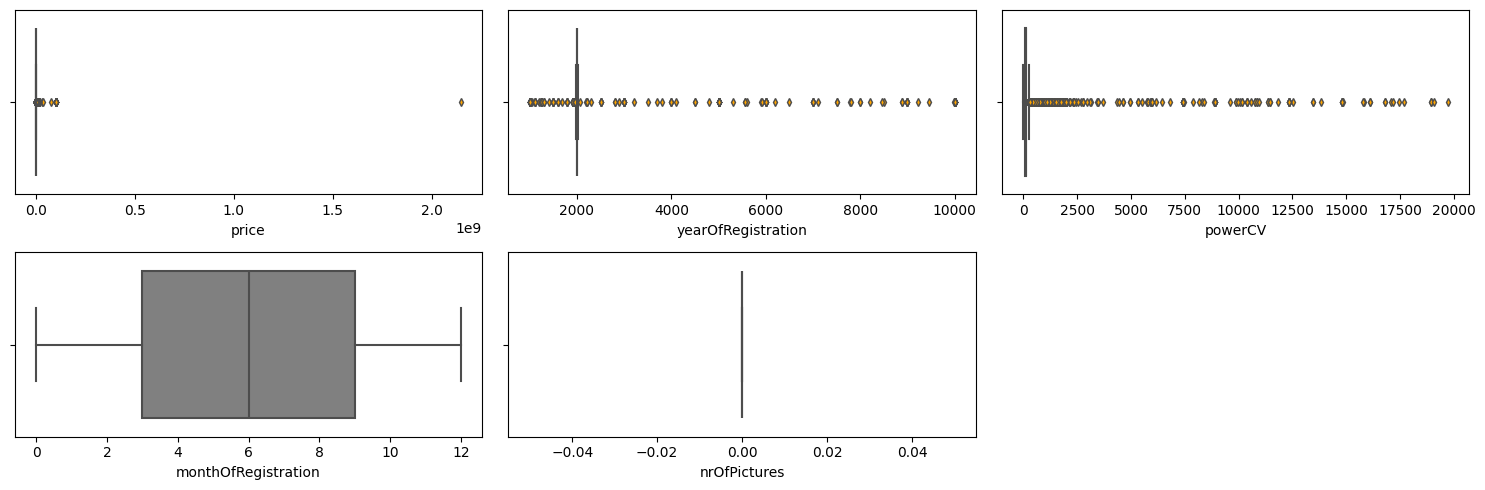

In [10]:
visualizador2.deteccion_outliers()

### Resumen de Gráficas de Distribución de Variables Numéricas

1. **price**:
   - La variable de precios muestra una gran cantidad de **valores atípicos** (outliers) hacia el lado derecho. La mayoría de los precios están concentrados en valores bajos, mientras que existen algunos precios extremadamente altos.

2. **yearOfRegistration**:
   - La mayoría de los vehículos están registrados en años recientes (cerca del 2000). Sin embargo, también hay valores atípicos en años mucho más altos (fuera de un rango plausible).

3. **powerCV**:
   - La potencia de los vehículos (caballos de fuerza) está concentrada en valores bajos, aunque se observan algunos valores atípicos muy altos, llegando hasta 20000 CV.

4. **monthOfRegistration**:
   - La distribución de los meses de registro es bastante uniforme, con valores distribuidos entre los 12 meses del año, lo cual indica que no hay una estacionalidad particular en el registro de vehículos.

5. **nrOfPictures**:
   - Esta variable parece tener **una distribución constante en 0**, indicando que casi todos los registros de vehículos no tienen imágenes asociadas o que la variable podría no estar correctamente registrada.

Estas gráficas revelan **presencia de outliers significativos en varias variables**, especialmente en precio, año de registro y potencia, lo cual puede afectar el análisis de los datos si no se toman en cuenta.


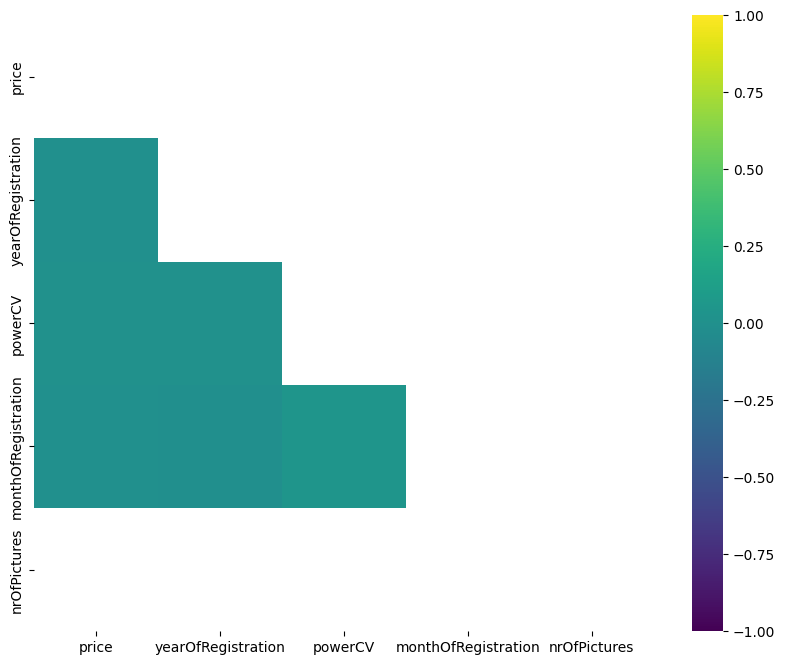

In [11]:
visualizador2.correlacion(tamano_grafica=(10, 8))

### Resumen del Mapa de Calor de Correlación

El mapa de calor muestra la **correlación entre las variables numéricas** en el conjunto de datos. Aquí se detallan algunas observaciones:

1. **Correlaciones altas o positivas**:
   - No se observan correlaciones particularmente fuertes o positivas entre las variables mostradas. Las celdas del mapa de calor se ven uniformes en su mayoría, lo cual indica que las variables tienen poca o ninguna relación lineal directa.

2. **Correlaciones bajas o negativas**:
   - La mayoría de las correlaciones son cercanas a cero, lo que sugiere que las variables como **price, yearOfRegistration, powerCV, monthOfRegistration, y nrOfPictures** son **independientes entre sí** en gran medida.

3. **Escala de colores**:
   - La escala de colores va de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta), pero en este caso, las correlaciones no se acercan a esos valores extremos.

En resumen, **no se detectan correlaciones fuertes entre las variables numéricas**, lo que podría indicar que cada variable proporciona información única sin redundancia directa en el conjunto de datos.


In [12]:
df_filtrado_categoricas['yearOfRegistration'] = df_filtrado_categoricas['yearOfRegistration'].apply(lambda x: "unknown" if x < 1886 or x > 2024 else x)

In [13]:
import pandas as pd

def obtener_decada(year):
    if year == "unknown":
        return "unknown"
    try:
        decade = (int(year) // 10) * 10  
        return f"milnovecientos {decade % 100}" if decade < 2000 else f"dos mil {decade % 100}"
    except:
        return "unknown"

df_filtrado_categoricas['yearOfRegistration'] = df_filtrado_categoricas['yearOfRegistration'].apply(obtener_decada)

In [14]:
gestion_de_nulos = sn.GestionNulos(df_filtrado_categoricas)

In [15]:
lista_moda = ['gearbox', 'fuelType']
lista_nueva_cat = ['vehicleType', 'notRepairedDamage']
df_imputado_categoricas = gestion_de_nulos.imputar_nulos_categoricas(lista_moda, lista_nueva_cat)

In [16]:
lista_columnas_knn = ['powerCV']
df_imputado_knn = gestion_de_nulos.imputar_knn(lista_columnas_knn)

In [17]:
resultados_finales = gestion_de_nulos.calcular_porcentaje_nulos()
resultados_finales

Series([], dtype: float64)

In [18]:
def obtener_decada(year):
    if year == "unknown":
        return "unknown"
    try:
        decade = (int(year) // 10) * 10  # Obtener la década, por ejemplo, 1960 para 1963
        return f"milnovecientos {decade % 100}" if decade < 2000 else f"dos mil {decade % 100}"
    except:
        return "unknown"

# Aplicar la función a la columna 'yearOfRegistration'
df['decada'] = df['yearOfRegistration'].apply(obtener_decada)

In [20]:
df_filtrado_categoricas.to_csv("datos/datos_tratados.csv")